In [9]:
# Brownian motion comes from physics. It describes the random movement of particles in a substance. A Wiener process is a one-dimentional Brownian motion. It’s named after Norbert Wiener who won a Nobel Prize studying one-dimentional Brownian motions.

# The Wiener process features prominently in quantitative finance because of some useful mathemetical properties.

# The GBM is a continuous-time stochastic process where where the log of the random variable follows the Wiener process with drift.

# What?

# It’s a data series that trends up or down through time with a defined level of volatility.

# And it’s perfect for simulating stock prices.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# Since I’m simulating stock prices, 
# I don’t need to download data.

In [11]:
# To simulate stock prices, we need some input parameters.
s0 = 131.00             # Is the inital Stock Price
sigma = 0.25            # Is percentage volatility
mu = 0.35               # Is drift, sets overall trend

# setup the simulation
paths = 1000            # Sets number of simulations
delta = 1.0 / 252.0     # Refers to time step, 1/252 
                        # one day out of 252 days.

time = 252 * 5          # Sets timeline for simulation
                        # (Year * Number of years)

                        

In [12]:
# Builf the Wiener Proccess
def weiner_process(delta, sigma, time, paths):
    """Returns a Wiener Process

    Parameters
    ~~~~~~~~~~
    Delta: FLoat
        The incriment to downsample sigma
    Sigma: Float
        Percentage Volatility
    Time: Int
        Number of samples to create
    Paths: Int
        Number of price simulations to create

    Returns
    ~~~~~~~
    wiener_process : np.array

    Notes
    ~~~~~
    This method returns a Wiener Process.
    The Wiener process is also called Brownian
    Motion. For more information about the 
    Wiener process check out the Wikipedia
    page: http://en.wikipedia.org/wiki/Wiener_process
    """
    # Return an array of samples from a normal Distribution
    return sigma * np.random.normal(loc  = 0, scale = np.sqrt(delta), size = (time, paths))

In [13]:
# This is the Geometric Brownian Motion
def gbm_returns(delta, sigma, time, mu, paths):
    """Returns from a geometric brownian motion

    Parameters
    ---------
    Delta: Float
        The incriment to downsample sigma
    Sigma: Float
        Percentage Volatility
    Time: Int
        Number of samples to create
    MU: Float
        Percentage Drift
    Paths: Int
        Number of price simulations to create
    
    Returns
    ------
    gbm_returns :np.ndarray
    
    Notes
    -----
    This method constructs random Geometric Brownian Motion (GBM).
    """
    process = weiner_process(delta, sigma, time, paths)
    return np.exp(
        process + (mu - sigma ** 2 / 2) * delta
    )

In [16]:
def gbm_levels(s0, delta, sigma, time, mu, paths):
    """Returns price paths starting at s0

    Parameters
    ----------
    s0 : Float
        The starting stock price
    Delta: Float
        The incriment to downsample sigm
    Sigma: Float
        Percentage Volatility
    Time: Int
        Number of sampels to create
    mu: FLoat
        Percentage Drift
    Paths: Int
        Number of price simulations to create

    Returns
    ------
    gbm_levels : np.ndarray
    """
    returns = gbm_returns(delta, sigma, time, mu, paths)

    stacked = np.vstack([np.ones(paths), returns])
    return s0 * stacked.cumprod(axis = 0)

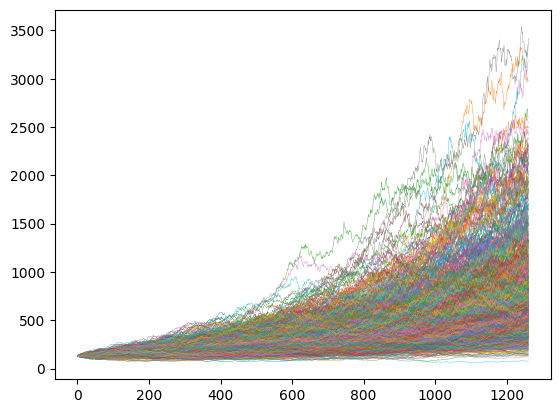

In [17]:
#The first example simulates 1,000 price paths over 5 years. 
# It starts at a price of 131 with 25% annualized volatility and 35% average return per year. 
# This is the volatility and return of Apple in 2021

price_paths = gbm_levels(s0, delta, sigma, time, mu, paths)
plt.plot(price_paths, linewidth = 0.25)
plt.show()

In [ ]:
# As you might expect, a 35% drift causes most price paths to increase from from the initial price. 
# In fact we can test exactly how many have increased from the initial price.``

In [23]:
len(price_paths[-1, price_paths[-1,:] > s0])

998

In [ ]:
# 999 of the 1,000 samples have increased.

# In the second example I set the drift to 0.0.


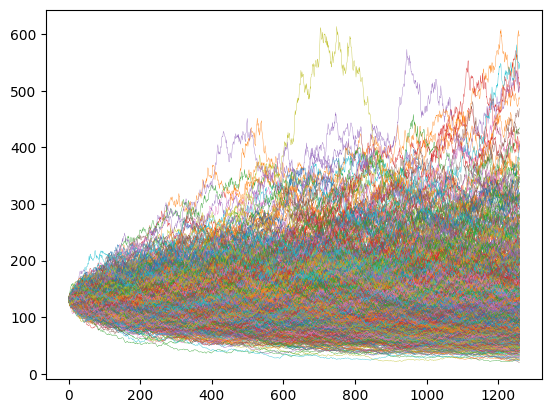

In [27]:
price_paths = gbm_levels(s0, delta, sigma, time, 0.0, paths)
plt.plot(price_paths, linewidth = 0.25)
plt.show()

In [ ]:
# And I get a much different picture.

# Only 402 prices end up higher than the original price.

# Spend some time and play around with the variables. 
# What happens if you double volatility? What happens if you set mu to a negative number?
